In [7]:
# Import dependencies
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [9]:
# Import Data
main_file_path = '../../data/data_customer.csv'
data = pd.read_csv(main_file_path)

print('Number of Samples: ', data.shape[0])
print('Number of Attributes: ', data.shape[1]-1)
data.head()

Number of Samples:  7043
Number of Attributes:  20


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Preprocessing

In [10]:
# Display Data types of each column
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
# Variable TotalCharges should be a continuous numeric data type rather than a discrete object data type
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

# Check for NULL entries
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Remove all entries that contain NULL
data.dropna(inplace=True)

# Remove customer ID
df = data.iloc[:,1:]

# Separate X and Y
ydata = df.Churn #df_upsampled.Churn
xdata_raw = df.drop(['Churn'], axis=1) #df_upsampled.drop(['Churn'], axis=1)

# Convert Chrun into binary numeric variable
ydata.replace(to_replace='Yes', value=1, inplace=True)
ydata.replace(to_replace='No', value=0, inplace=True)

# Convert all categorial variables in xdata into dummy variables
xdata = pd.get_dummies(xdata_raw)



In [13]:
i_class0 = np.where(ydata == 0)[0]
i_class1 = np.where(ydata == 1)[0]
print("If choose 0 for all guesses: ", len(i_class0)/data.shape[0])

If choose 0 for all guesses:  0.7342150170648464


## Data Visualization

Number Churned:  1869
Number Not Churned:  5163


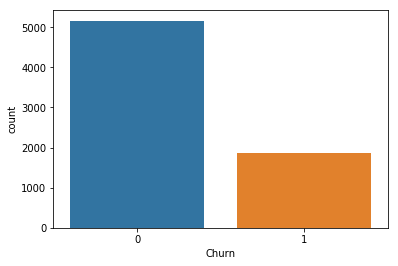

In [14]:
import seaborn as sns

ax = sns.countplot(ydata,label="Count")       
Not_Churned, Churned = ydata.value_counts()
print('Number Churned: ', Churned)
print('Number Not Churned: ',Not_Churned)

In [15]:
#Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=.2, random_state=101, stratify=ydata)

In [16]:
# Scale all features from 0 to 1
from sklearn.preprocessing import MinMaxScaler

features = X_train.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_train.columns = features
X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = features

X_train.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.887324,0.717131,0.647398,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.971831,0.950199,0.888051,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.084507,0.406873,0.040440,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.126761,0.017430,0.019225,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.436620,0.749502,0.340642,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Predictive Models - Parameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

def grid_search(estimator, param_grid, X_train, y_train):
    grid = GridSearchCV(estimator, param_grid, cv=10, scoring='accuracy', return_train_score=True)
    grid.fit(X_train, y_train)
#     print(pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']])

#     print()
    # examine the best model
    print('Best_score = ', grid.best_score_)
    print('Best_params = ', grid.best_params_)
    return grid

##### **Decision Tree**

In [18]:
from sklearn.tree import DecisionTreeClassifier

param_grid={
             'criterion': ["gini", "entropy"],
             'max_depth': range(2,21,2),
           }

dtree_grid = grid_search(DecisionTreeClassifier(), param_grid, X_train, y_train)
joblib.dump(dtree_grid, 'dtree_grid.pkl')


Best_score =  0.7914666666666667
Best_params =  {'criterion': 'gini', 'max_depth': 4}


['dtree_grid.pkl']

##### **Nerual Network**

In [19]:
from sklearn.neural_network import MLPClassifier

param_grid = {
               'solver': ['lbfgs','sgd','adam'],
               'alpha': 10.0 ** -np.arange(1, 5),
               'hidden_layer_sizes':[1,2,5,10], 
               'random_state':[0,4,8]
             }

nn_grid = grid_search(MLPClassifier(), param_grid, X_train, y_train)
joblib.dump(nn_grid, 'nn_grid.pkl')


Best_score =  0.8049777777777778
Best_params =  {'hidden_layer_sizes': 5, 'random_state': 8, 'alpha': 0.001, 'solver': 'adam'}


['nn_grid.pkl']

##### **Boosting**

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
               'loss': ['deviance', 'exponential'],    
               'learning_rate': [0.05, 0.1, 0.2],
               'max_depth': [2,5,10,15,20],
               'min_samples_split': [2,5,10,15]
             }

gb_grid = grid_search(GradientBoostingClassifier(random_state = 0), param_grid, X_train, y_train)
joblib.dump(gb_grid, 'gb_grid.pkl')
 

Best_score =  0.8024888888888889
Best_params =  {'min_samples_split': 10, 'loss': 'exponential', 'learning_rate': 0.1, 'max_depth': 5}


['gb_grid.pkl']

##### **Support Vector Machine**

In [21]:
from sklearn.svm import SVC

param_grid = [
               {
                 'C': [1, 10, 100, 1000], 
                 'kernel': ['linear']
               },
               {
                 'C': [1, 10, 100, 1000], 
                 'gamma': [0.001, 0.0001], 
                 'kernel': ['rbf']
               },
             ]

svc_grid = grid_search(SVC(), param_grid, X_train, y_train)
joblib.dump(svc_grid, 'svc_grid.pkl')

Best_score =  0.8007111111111112
Best_params =  {'gamma': 0.001, 'kernel': 'rbf', 'C': 100}


['svc_grid.pkl']

##### **K Nearest Neighbors**

In [22]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
               'n_neighbors': range(1, 31),    
               'weights': ['uniform', 'distance']
             }

knn_grid = grid_search(KNeighborsClassifier(), param_grid, X_train, y_train)
joblib.dump(knn_grid, 'knn_grid.pkl')

Best_score =  0.7820444444444444
Best_params =  {'n_neighbors': 22, 'weights': 'uniform'}


['knn_grid.pkl']

### Predictive Models - Learning Curves

In [23]:
#Load trained models
dtree_grid = joblib.load('dtree_grid.pkl') 
nn_grid = joblib.load('nn_grid.pkl') 
gb_grid = joblib.load('gb_grid.pkl') 
svc_grid = joblib.load('svc_grid.pkl') 
knn_grid = joblib.load('knn_grid.pkl') 

In [24]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, estimator_name, X, y, ylim=None, cv=10, train_sizes=[19,50,100,200,300,400]):
    plt.figure()
    param_str = ', '.join('\'{}\': {}'.format(key, val) for key, val in estimator.best_params_.items())
    plt.title(estimator_name + ' ' + "Learning Curves [{}]".format(param_str))
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator.best_estimator_, X, y, cv=cv, scoring='accuracy', train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig('Learning_curve-{}.png'.format(estimator_name))
    plt.show()
    return plt

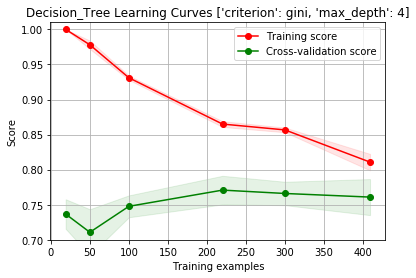

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [25]:
#Decision Tree
plot_learning_curve(dtree_grid, 'Decision_Tree', X_train, y_train, (0.7,1.01), train_sizes=[19,50,100,220,300,409])

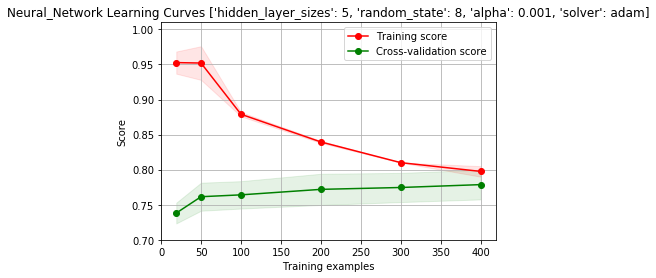

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [26]:
#Nueral Network
plot_learning_curve(nn_grid, 'Neural_Network', X_train, y_train, (0.7,1.01), cv=10)

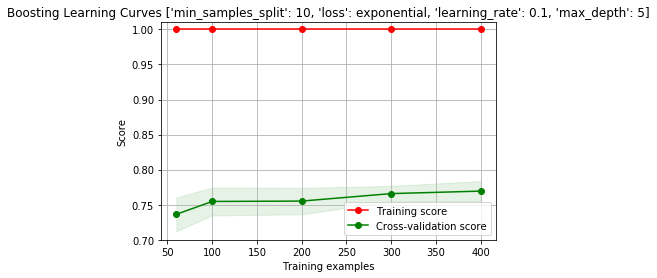

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [27]:
#Boosting
plot_learning_curve(gb_grid, 'Boosting', X_train, y_train, (0.7,1.01), cv=10, train_sizes=[60,100,200,300,400])

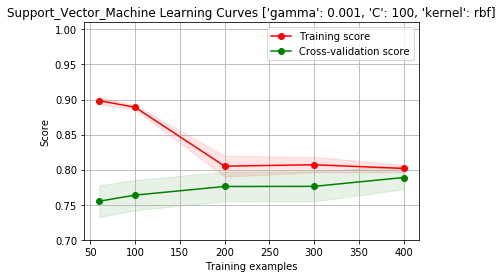

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [28]:
#SVM
plot_learning_curve(svc_grid, 'Support_Vector_Machine', X_train, y_train, (0.7,1.01), cv=10, train_sizes=[60,100,200,300,400])

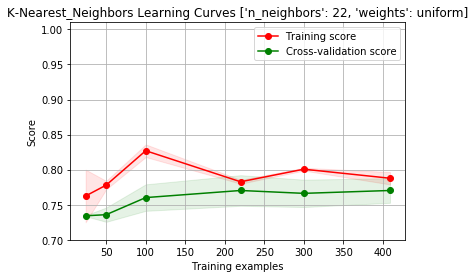

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [29]:
#KNN
plot_learning_curve(knn_grid, 'K-Nearest_Neighbors', X_train, y_train, (0.7,1.01), cv=10, train_sizes=[24,50,100,220,300,409])

## Complexity Curves - Hyperparameters

In [30]:
from sklearn.model_selection import validation_curve
def complexity_curve(estimator, title, param_name, param_range, X=X_train,y=y_train):
    train_scores, test_scores = validation_curve(estimator.best_estimator_, X, y, param_name=param_name, param_range=param_range,cv=10, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.title("Complexity Curve with " + title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.6, 1.05)

    plt.plot(param_range, train_scores_mean,'o-', label="Training score",
                 color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.plot(param_range, test_scores_mean,'o-', label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.legend(loc="lower right")
    plt.savefig('Complexity_curve-{}.png'.format(title))
    plt.show()

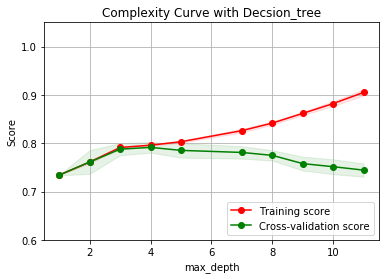

In [31]:
# Decision Tree
complexity_curve(dtree_grid, 'Decsion_tree', 'max_depth', [1,2,3,4,5,7,8,9,10,11])

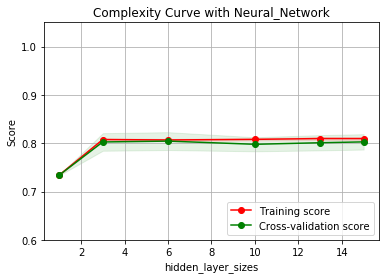

In [32]:
# Neural Network
complexity_curve(nn_grid, 'Neural_Network', 'hidden_layer_sizes', [1,3,6,10,13,15])

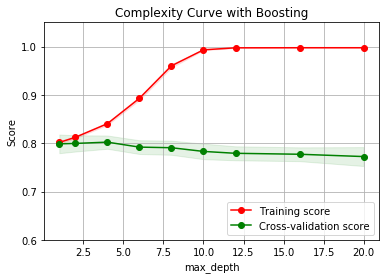

In [33]:
# Boosting
complexity_curve(gb_grid, 'Boosting', 'max_depth', [1,2,4,6,8,10,12,16,20])

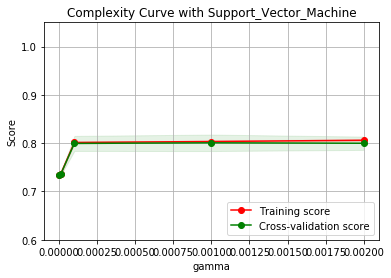

In [34]:
# SVM
complexity_curve(svc_grid, 'Support_Vector_Machine', 'gamma', [.000001,.00001,.0001,.001,.002])

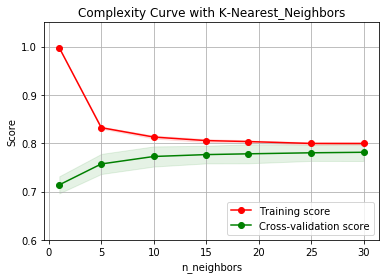

In [35]:
# KNN
complexity_curve(knn_grid, 'K-Nearest_Neighbors', 'n_neighbors', [1,5,10,15,19,25,30])

## Learning Curves - Iterations

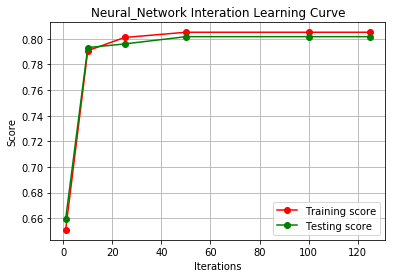

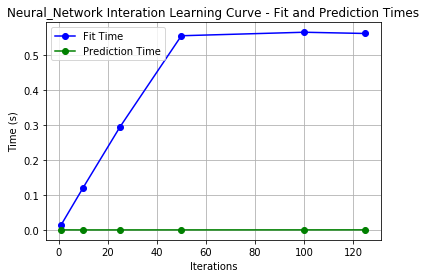

In [36]:
from sklearn.metrics import accuracy_score

title = 'Neural_Network'
iterations= [1,10,25,50,100,125]
fit_times = []
pred_times = []
train_scores = []
test_scores = []

for iteration in iterations: 
    estimator = MLPClassifier(random_state=6,hidden_layer_sizes=10,solver='adam',alpha=0.1, max_iter=iteration)
    start_time = timeit.default_timer()
    estimator.fit(X_train, y_train) 
    fit_times.append(timeit.default_timer() - start_time)

    start_time1 = timeit.default_timer()
    y_pred = estimator.predict(X_test)
    pred_times.append(timeit.default_timer() - start_time1)
    test_scores.append(accuracy_score(y_test, y_pred))

    y_pred = estimator.predict(X_train)
    train_scores.append(accuracy_score(y_train, y_pred))


plt.figure(0)
plt.grid()
plt.plot(iterations, train_scores,'o-', label="Training score", color="r")
plt.plot(iterations, test_scores,'o-', label="Testing score", color="g")
plt.ylabel('Score')
plt.xlabel('Iterations')
plt.title(title + ' Interation Learning Curve')
plt.legend(loc="best")
plt.savefig('Iteration_Score_curve-{}.png'.format(title))
plt.show()

plt.figure(1)
plt.grid()
plt.plot(iterations, fit_times,'o-', label="Fit Time", color="b")
plt.plot(iterations, pred_times,'o-', label="Prediction Time", color="g")
plt.ylabel('Time (s)')
plt.xlabel('Iterations')
plt.title(title + ' Interation Learning Curve - Fit and Prediction Times')
plt.legend(loc="best")
plt.savefig('Iteration_Time_curve-{}.png'.format(title))
plt.show()

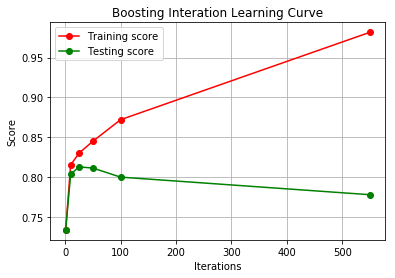

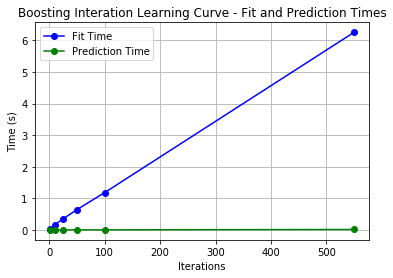

In [37]:
# Boosting
title = 'Boosting'
iterations= [1,10,25,50,100,550]
fit_times = []
pred_times = []
train_scores = []
test_scores = []

for iteration in iterations: 
    estimator = GradientBoostingClassifier(min_samples_split=15, loss='deviance', learning_rate=0.2, max_depth=4, n_estimators=iteration)
    start_time = timeit.default_timer()
    estimator.fit(X_train, y_train) 
    fit_times.append(timeit.default_timer() - start_time)

    start_time1 = timeit.default_timer()
    y_pred = estimator.predict(X_test)
    pred_times.append(timeit.default_timer() - start_time1)
    test_scores.append(accuracy_score(y_test, y_pred))

    y_pred = estimator.predict(X_train)
    train_scores.append(accuracy_score(y_train, y_pred))


plt.figure(0)
plt.grid()
plt.plot(iterations, train_scores,'o-', label="Training score", color="r")
plt.plot(iterations, test_scores,'o-', label="Testing score", color="g")
plt.ylabel('Score')
plt.xlabel('Iterations')
plt.title(title + ' Interation Learning Curve')
plt.legend(loc="best")
plt.savefig('Iteration_Score_curve-{}.png'.format(title))
plt.show()

plt.figure(1)
plt.grid()
plt.plot(iterations, fit_times,'o-', label="Fit Time", color="b")
plt.plot(iterations, pred_times,'o-', label="Prediction Time", color="g")
plt.ylabel('Time (s)')
plt.xlabel('Iterations')
plt.title(title + ' Interation Learning Curve - Fit and Prediction Times')
plt.legend(loc="best")
plt.savefig('Iteration_Time_curve-{}.png'.format(title))
plt.show()


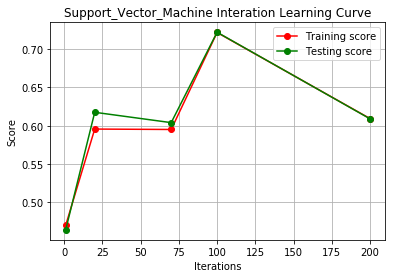

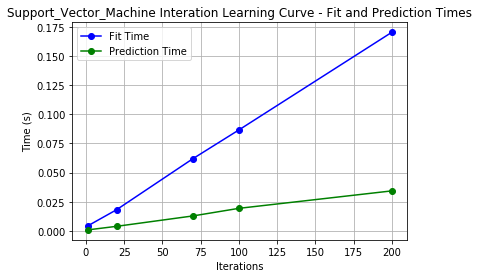

In [45]:
# SVM
title = 'Support_Vector_Machine'
iterations= [1,20,70,100]
fit_times = []
pred_times = []
train_scores = []
test_scores = []

for iteration in iterations: 
    estimator = SVC(C=1000,gamma=0.001,kernel='rbf', max_iter=iteration)
    start_time = timeit.default_timer()
    estimator.fit(X_train, y_train) 
    fit_times.append(timeit.default_timer() - start_time)

    start_time1 = timeit.default_timer()
    y_pred = estimator.predict(X_test)
    pred_times.append(timeit.default_timer() - start_time1)
    test_scores.append(accuracy_score(y_test, y_pred))

    y_pred = estimator.predict(X_train)
    train_scores.append(accuracy_score(y_train, y_pred))


plt.figure(0)
plt.grid()
plt.plot(iterations, train_scores,'o-', label="Training score", color="r")
plt.plot(iterations, test_scores,'o-', label="Testing score", color="g")
plt.ylabel('Score')
plt.xlabel('Iterations')
plt.title(title + ' Interation Learning Curve')
plt.legend(loc="best")
plt.savefig('Iteration_Score_curve-{}.png'.format(title))
plt.show()

plt.figure(1)
plt.grid()
plt.plot(iterations, fit_times,'o-', label="Fit Time", color="b")
plt.plot(iterations, pred_times,'o-', label="Prediction Time", color="g")
plt.ylabel('Time (s)')
plt.xlabel('Iterations')
plt.title(title + ' Interation Learning Curve - Fit and Prediction Times')
plt.legend(loc="best")
plt.savefig('Iteration_Time_curve-{}.png'.format(title))
plt.show()

In [39]:
def final_test_score(estimator, title):
    start_time = timeit.default_timer()
    estimator.fit(X_train, y_train) 
    print(title + ' Fit Time: ',round(timeit.default_timer() - start_time,5))

    start_time1 = timeit.default_timer()
    y_pred = estimator.predict(X_test)
    print(title + ' Prediction Time: ',round(timeit.default_timer() - start_time1,5))
    print(title + ' Final Test Score: ',round(accuracy_score(y_test, y_pred)*100,1),'%')

#### - Decision Tree

In [40]:
final_test_score(dtree_grid.best_estimator_, 'Decision_Tree')


Decision_Tree Fit Time:  0.01294
Decision_Tree Prediction Time:  0.00056
Decision_Tree Final Test Score:  79.0 %


#### - Neural Network

In [41]:
final_test_score(nn_grid.best_estimator_, 'Neural_Network')

Neural_Network Fit Time:  0.45828
Neural_Network Prediction Time:  0.00081
Neural_Network Final Test Score:  80.0 %


#### - Boosting

In [42]:
final_test_score(gb_grid.best_estimator_, 'Boosting')

Boosting Fit Time:  1.82012
Boosting Prediction Time:  0.00462
Boosting Final Test Score:  81.0 %


#### - Support Vector Machine

In [43]:
final_test_score(svc_grid.best_estimator_, 'Support_Vector_Machine')

Support_Vector_Machine Fit Time:  1.53708
Support_Vector_Machine Prediction Time:  0.26677
Support_Vector_Machine Final Test Score:  79.5 %


#### -  K-NN

In [44]:
final_test_score(knn_grid.best_estimator_, 'K-Nearest_Neighbors')

K-Nearest_Neighbors Fit Time:  0.03499
K-Nearest_Neighbors Prediction Time:  0.5801
K-Nearest_Neighbors Final Test Score:  79.2 %
